# Analyzing Toronto Power Demand Data (2016-2018)



In [1]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Read the demand data for past 3 years
df =  pd.read_csv("data/power_data.csv", parse_dates=['Date'])
df.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff
0,2016-01-01,1,13417,479,1318,783,965,4789,867,57,2603,377,1212,13451,33
1,2016-01-01,2,12968,473,1281,715,975,4597,829,59,2491,377,1183,12979,11
2,2016-01-01,3,12395,464,1158,693,945,4441,796,65,2392,365,1135,12454,59
3,2016-01-01,4,12228,447,1170,681,923,4332,776,48,2349,352,1118,12195,-33
4,2016-01-01,5,12116,432,1182,676,926,4272,774,63,2307,349,1108,12089,-28


In [3]:
df1 = df[["Date", "Hour", "Toronto"]]
df1 = df1.loc[df['Date'].dt.year == 2018]
df1.head()


,Date,Hour,Toronto
17544,2018-01-01,1,5340
17545,2018-01-01,2,5211
17546,2018-01-01,3,5096
17547,2018-01-01,4,4987
17548,2018-01-01,5,4926


In [4]:
df1.describe()


,Hour,Toronto
count,8760.000000,8760.000000
mean,12.500000,5788.080365
std,6.922582,1011.674530
min,1.000000,3625.000000
25%,6.750000,5003.000000
50%,12.500000,5789.000000
75%,18.250000,6398.000000
max,24.000000,9427.000000


In [5]:
ss_decomposition = seasonal_decompose(x=df1["Toronto"], model='multiplicative', freq=6)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

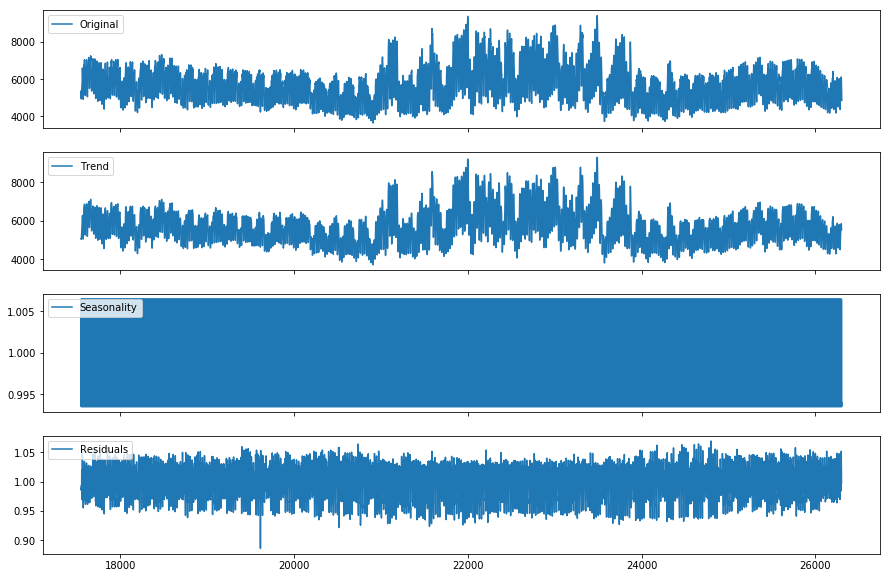

In [6]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df1["Toronto"], label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

Text(0.5, 0, 'Hour')

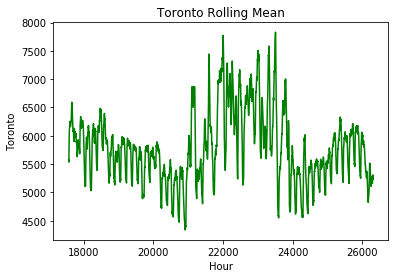

In [7]:
pd.Series.rolling(df1["Toronto"], window=25).mean().plot(style="-g")
plt.title("Toronto Rolling Mean")
plt.ylabel("Toronto")
plt.xlabel("Hour")

Text(0.5, 0, 'Power Demand')

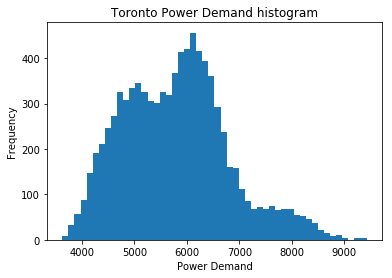

In [8]:
plt.figure()
df1["Toronto"].plot(kind="hist", stacked=True, bins=50)
plt.title("Toronto Power Demand histogram")
plt.xlabel("Power Demand")

In [9]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

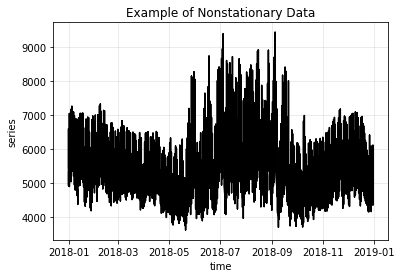

In [10]:
run_sequence_plot(df1["Date"], df1["Toronto"],
                  title="Example of Nonstationary Data")

In [11]:
# split data into 10 chunks
chunks = np.split(df1["Toronto"], indices_or_sections=10)
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 5904.26 | 5.45811e+05
    2 | 5780.95 | 5.10792e+05
    3 | 5568.2 | 4.06954e+05
    4 | 5143.78 | 5.66528e+05
    5 | 5928.49 | 1.36233e+06
    6 | 6547.58 | 1.56256e+06
    7 | 6307.11 | 1.57388e+06
    8 | 5486.76 | 1.05008e+06
    9 | 5529.72 | 5.65775e+05
   10 | 5683.95 | 5.77633e+05


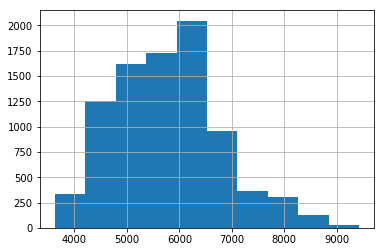

In [12]:
pd.Series(df1["Toronto"]).hist();

In [13]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df1["Toronto"])

In [14]:
print(adf)

-9.170967628036733


In [15]:
print(pvalue)

2.389009930852908e-15


In [16]:
print(nobs)

8731


In [17]:
print(critical_values)

{'1%': -3.431099195237286, '5%': -2.8618710944295014, '10%': -2.566946236596859}


In [18]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(df1["Toronto"], regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  -9.170967628036733
p-value: 2.389009930852908e-15


In [19]:
lagged = df1["Toronto"].shift(24).dropna()
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(lagged, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  -7.96390853554881
p-value: 2.8991744837440744e-12
